In [38]:
import pandas as pd
import allel
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
clim1001 = pd.read_csv('../key_files/1001g_regmap_grenet_ecotype_info_corrected_bioclim_2024May16.csv')

clim1001['ecotypeid'] = clim1001['ecotypeid'].astype(str)

ecotypeid_to_bio1 = clim1001.set_index('ecotypeid')['bio1'].to_dict()

In [40]:
samples = pd.read_csv('../key_files/merged_sample_table.csv')[['site', 'plot', 'generation', 'total_flower_counts']]

samples = samples.groupby(['site', 'plot', 'generation'])['total_flower_counts'].sum().reset_index()

samples['min_perc'] = 1/samples['total_flower_counts']

samples['code'] = samples['site'].astype(str) + '_'  + samples['generation'].astype(str) + '_' + samples['plot'].astype(str) 

In [41]:
last_gen = pd.read_csv('../key_files/final_gen.csv')['sample_name']

In [42]:
first_gen = pd.read_csv('../key_files/generation_1_sample_names.txt', sep = '\t', header=None)[0]

In [43]:
#ecotype_freq = pd.read_csv('../key_files/delta_ecotype_freq.txt',sep = '\t', usecols = last_gen)

In [44]:
ecotype_freq = pd.read_csv('../key_files/merged_ecotype_frequency.txt',sep = '\t', usecols = last_gen)

In [45]:
clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/worldclim_sitesdata.csv')

clim_sites_during_exp = clim_sites_during_exp[['site', 'bio1']]

clim_sites_during_exp['site'] = clim_sites_during_exp['site'].astype(str)

In [46]:
grenenet_ecotypes = pd.read_csv('../key_files/founder_ecotype_frequency.txt', sep = '\t',header=None)[0]

ecotype_freq = ecotype_freq.set_index(grenenet_ecotypes)

ecotype_freq = ecotype_freq.T 
ecotype_freq = ecotype_freq.reset_index()
ecotype_freq['generation'] = ecotype_freq['index'].str.split('_').str[1]

ecotype_freq['plot'] = ecotype_freq['index'].str.split('_').str[2]

ecotype_freq['site'] = ecotype_freq['index'].str.split('_').str[0] 

ecotype_freq['generation'].unique()

ecotype_freq = ecotype_freq.drop('index', axis=1)

ecotype_freq = ecotype_freq.melt(id_vars = ['plot','site', 'generation'])

ecotype_freq.columns = ['plot','site', 'generation', 'ecotype', 'freq']

In [47]:
clim1001f = clim1001[['ecotypeid', 'bio1']]

In [48]:
#clim1001f = clim1001f[clim1001f['bio1'] > 13]

In [49]:
clim1001f['ecotypeid'] = clim1001f['ecotypeid'].astype(int)

/tmp/ipykernel_1238333/3068168531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clim1001f['ecotypeid'] = clim1001f['ecotypeid'].astype(int)


In [50]:
ecotype_freq = ecotype_freq.merge(clim1001f, left_on = 'ecotype', right_on = 'ecotypeid')

In [51]:
ecotype_freq['generation'] = ecotype_freq['generation'].astype(int)

In [52]:
ecotype_freq.columns = ['plot', 'site', 'generation', 'ecotype', 'ecotype_freq', 'ecotypeid', 'bio1_ecotype']

In [53]:
ecotype_freq = ecotype_freq.merge(clim_sites_during_exp, on = 'site')

In [54]:
ecotype_freq.columns = ['plot', 'site', 'generation', 'ecotype', 'ecotype_freq', 'ecotypeid',
       'bio1_ecotype', 'bio1_site']

In [55]:
ecotype_freq['bio1_site'].describe()

count    82005.000000
mean        11.796925
std          4.018158
min          5.337500
25%          8.720833
50%         10.700000
75%         15.004167
max         19.791666
Name: bio1_site, dtype: float64

In [56]:
ecotype_freq['bio1_ecotype'].describe()

count    82005.000000
mean         9.584560
std          4.220076
min         -4.283333
25%          7.579167
50%          9.541667
75%         12.433333
max         22.700001
Name: bio1_ecotype, dtype: float64

In [57]:
ecotype_freq[['site', 'bio1_site']]['site'].unique()

array(['1', '2', '4', '5', '6', '9', '10', '11', '12', '13', '23', '24',
       '25', '26', '27', '28', '32', '33', '37', '42', '43', '45', '46',
       '48', '49', '52', '53', '54', '55', '57', '60'], dtype=object)

In [58]:
ecotype_freq[['site', 'bio1_site']].sort_values('bio1_site')

,site,bio1_site
37885,27,5.337500
37581,27,5.337500
37580,27,5.337500
37579,27,5.337500
37578,27,5.337500
...,...,...
16170,10,19.791666
16171,10,19.791666
16172,10,19.791666
16164,10,19.791666


In [341]:
#ecotype_freq[(ecotype_freq['site']=='27') & (ecotype_freq['ecotype']==766)]

In [342]:
sns.kdeplot(
    data=ecotype_freq, x="bio1_ecotype", y="bio1_site",
b    fill=True, thresh=0, levels=100, cmap="mako",
)

SyntaxError: positional argument follows keyword argument (2954318481.py, line 3)

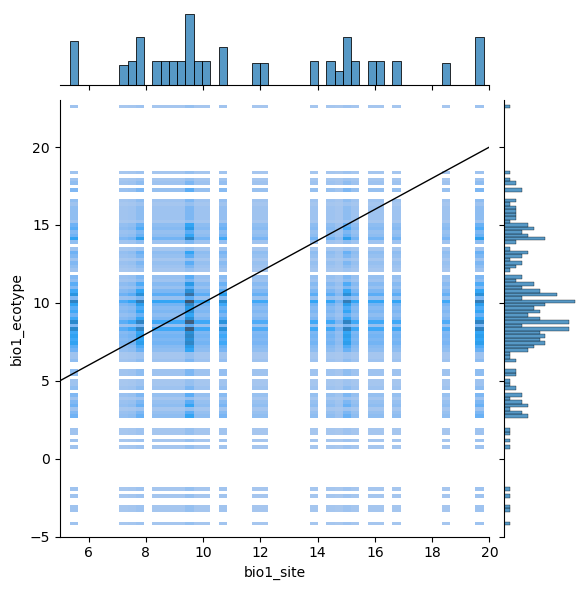

In [343]:
jp =  sns.jointplot(data=ecotype_freq, x="bio1_site", y="bio1_ecotype", kind="hist")
# Set x and y axis limits
# Set x and y axis limits on the joint plot axis
jp.ax_joint.set_xlim(5, 20)
jp.ax_joint.set_ylim(-5, 23)

# Add a diagonal line from the lower left to the upper right
jp.ax_joint.plot([-5, 23], [-5, 23], 'k-', linewidth=1)  # 'k-' sets the color to black and the line style to solid

plt.show()

In [59]:
# Calculate which points are above and below the line y = x
ecotype_freq['rs'] = 'hot'  # Set default value for the new column
ecotype_freq.loc[ecotype_freq['bio1_ecotype'] > ecotype_freq['bio1_site'], 'rs'] = 'cold'
ecotype_freq.loc[ecotype_freq['bio1_ecotype'] == ecotype_freq['bio1_site'], 'rs'] = 'match'

/tmp/ipykernel_1238333/2645788797.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  g.ax_joint.plot([5, 20], [5, 20], 'k--', linewidth=1, color ='grey')


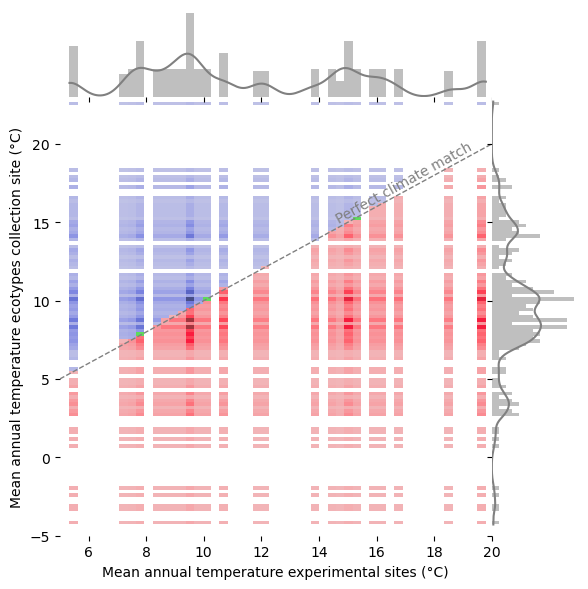

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame setup
# Set the color palette
palette = {'hot': '#B40426', 'cold': '#3B4CC0', 'match': 'green'}
median_bio1_ecotype = ecotype_freq['bio1_ecotype'].median()
q1_bio1_ecotype = ecotype_freq['bio1_ecotype'].quantile(.25)
q3_bio1_ecotype = ecotype_freq['bio1_ecotype'].quantile(.75)

# Create a joint grid to manually plot scatter and histograms
g = sns.JointGrid(data=ecotype_freq, x="bio1_site", y="bio1_ecotype", space=0)

# Main scatter plot with hue
sns.histplot(data=ecotype_freq, x="bio1_site", y="bio1_ecotype", hue="rs", palette=palette, ax=g.ax_joint)

# Marginal histograms on the top and right of the scatter plot without hue
sns.histplot(data=ecotype_freq, x="bio1_site", ax=g.ax_marg_x, color='gray', kde=True,edgecolor=None)
sns.histplot(data=ecotype_freq, y="bio1_ecotype", ax=g.ax_marg_y, color='gray', kde=True, edgecolor=None)

# Add a diagonal line from the practical lower left to the upper right
# Add lines with annotations
# Perfect climate match
g.ax_joint.plot([5, 20], [5, 20], 'k--', linewidth=1, color ='grey')
g.ax_joint.text(14.5, 15, 'Perfect climate match', color='grey', rotation=29)

# Median ecotype climate origin
#g.ax_joint.axhline(median_bio1_ecotype, color='grey', linestyle='--', linewidth=1)
#g.ax_joint.text(5, median_bio1_ecotype + 0.5, 'Median', color='grey')

# Q1 ecotype climate ranking
#g.ax_joint.axhline(q1_bio1_ecotype, color='grey', linestyle='--', linewidth=1)
#g.ax_joint.text(5, q1_bio1_ecotype - 1, 'Q1', color='grey')

# Q3 ecotype climate ranking
#g.ax_joint.axhline(q3_bio1_ecotype, color='grey', linestyle='--', linewidth=1)
#g.ax_joint.text(5, q3_bio1_ecotype + 0.5, 'Q3', color='grey')

# Set axis limits
g.ax_joint.set_xlim(5, 20)
g.ax_joint.set_ylim(-5, 23)

# Set x and y labels for the main plot
g.ax_joint.set_xlabel('Mean annual temperature experimental sites (°C)')
g.ax_joint.set_ylabel('Mean annual temperature ecotypes collection site (°C)')

# Remove spines for each plot in the JointGrid
for ax in [g.ax_joint, g.ax_marg_x, g.ax_marg_y]:
    for spine in ax.spines.values():
        spine.set_visible(False)


# Hide the legend for the scatterplot or customize it if needed
g.ax_joint.legend_.remove()
plt.savefig('experimental_sites_vs_ecotypes_collection_site.png')
plt.savefig('experimental_sites_vs_ecotypes_collection_site.svg')
plt.show()


In [60]:
ecotype_to_climate = ecotype_freq[['ecotype', 'bio1_ecotype']].drop_duplicates().set_index('ecotype')['bio1_ecotype'].sort_values().to_dict()
climate_to_ecotype = ecotype_freq[['bio1_ecotype', 'ecotype']].drop_duplicates().set_index('bio1_ecotype')['ecotype'].sort_values().to_dict()

site_to_climate = ecotype_freq[['site', 'bio1_site']].drop_duplicates().set_index('site')['bio1_site'].sort_values().to_dict()
climate_to_site = ecotype_freq[['bio1_site', 'site']].drop_duplicates().set_index('bio1_site')['site'].sort_values().to_dict()

ecotype_freq['climatic_distance'] = ecotype_freq['bio1_ecotype'] - ecotype_freq['bio1_site']

distance_ecotypes_sites = ecotype_freq.pivot_table(index='ecotype', columns = 'site', values = 'climatic_distance')

# Map ecotype and site to bio1_climate, sort by climate, and then map back to ecotypes and sites
sorted_ecotypes = (ecotype_freq[['ecotype', 'bio1_ecotype']]
                   .drop_duplicates()
                   .set_index('ecotype')
                   ['bio1_ecotype']
                   .sort_values(ascending=False)
                   .index)

sorted_sites = (ecotype_freq[['site', 'bio1_site']]
                .drop_duplicates()
                .set_index('site')
                ['bio1_site']
                .sort_values()
                .index)

# Reorder the distance matrix by the sorted ecotypes and sorted sites
distance_ecotypes_sites_sorted = distance_ecotypes_sites.loc[sorted_ecotypes, sorted_sites]


In [61]:
distance_ecotypes_sites_sorted.index = distance_ecotypes_sites_sorted.index.map(ecotype_to_climate)

In [62]:
distance_ecotypes_sites_sorted.index = np.round(distance_ecotypes_sites_sorted.index,2)

In [63]:
import numpy as np

In [64]:
ecotype_freq['ecotype_freq'].describe()

count    82005.000000
mean         0.004329
std          0.029672
min          0.000000
25%          0.000165
50%          0.000623
75%          0.001508
max          0.991888
Name: ecotype_freq, dtype: float64

In [65]:
ecotype_freq['ecotype_freq'].min()

0.0

In [66]:
ecotype_freq['ecotype_freq'].max()

0.991888

In [67]:
ef_ecotypes_sites = ecotype_freq.pivot_table(index='ecotype', columns = 'site', values = 'ecotype_freq')

In [68]:
smoothed_matrix.min().min()

NameError: name 'smoothed_matrix' is not defined

In [69]:
smoothed_matrix.max().max()

NameError: name 'smoothed_matrix' is not defined

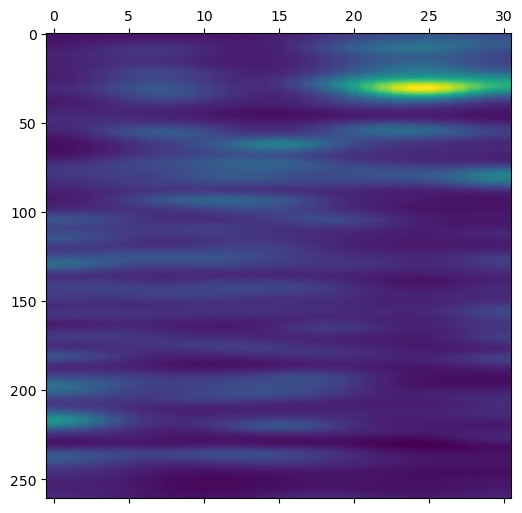

In [88]:
ef_ecotypes_sites = ecotype_freq.pivot_table(index='ecotype', columns = 'site', values = 'ecotype_freq')
#sorted_ecotypes = ef_ecotypes_sites.index.map(ecotype_to_climate).sort_values(ascending=False)#.map(climate_to_ecotype)
#sorted_columns = ef_ecotypes_sites.columns.map(site_to_climate).sort_values() #.map(climate_to_site)

ef_ecotypes_sites.index = ef_ecotypes_sites.index.map(ecotype_to_climate)
sorted_ecotypes = ef_ecotypes_sites.index.sort_values(ascending=False)
ef_ecotypes_sites.columns = ef_ecotypes_sites.columns.map(site_to_climate)
sorted_columns = ef_ecotypes_sites.columns.sort_values()

ef_ecotypes_sites = ef_ecotypes_sites.loc[sorted_ecotypes, sorted_columns]
ef_ecotypes_sites.index = np.round(ef_ecotypes_sites.index,2)
ef_ecotypes_sites.columns = np.round(ef_ecotypes_sites.columns, 2)

from scipy.ndimage import gaussian_filter

# Convert DataFrame to a NumPy array for processing
data_matrix = ef_ecotypes_sites.to_numpy()

# Replace NaN values with 0, so they don't affect the smoothing
data_matrix[np.isnan(data_matrix)] = 0

# Apply Gaussian smoothing
smoothed_matrix = gaussian_filter(data_matrix, sigma=3)

# Optionally, set zeros back to NaN for ignoring them in the plot
smoothed_matrix[smoothed_matrix == 0] = np.nan

plt.figure(figsize=(6, 6))
plt.matshow(smoothed_matrix, cmap='viridis',interpolation=None, aspect='auto',fignum=1)

In [121]:
smoothed_matrix

array([[-0.00265202, -0.00262282, -0.00256946, ...,  0.00300521,
         0.00289483,  0.00282573],
       [-0.00261972, -0.00258789, -0.00252973, ...,  0.00311115,
         0.00299642,  0.00292497],
       [-0.00255553, -0.00251861, -0.00245117, ...,  0.00330094,
         0.0031769 ,  0.00310045],
       ...,
       [-0.00154199, -0.00159629, -0.00170324, ..., -0.00223656,
        -0.00217047, -0.00213355],
       [-0.00149261, -0.00154907, -0.00165973, ..., -0.00215955,
        -0.00209103, -0.00205268],
       [-0.00146523, -0.00152289, -0.0016356 , ..., -0.002117  ,
        -0.0020472 , -0.00200808]])

In [89]:
distance_ecotypes_sites_sorted.index = np.round(distance_ecotypes_sites_sorted.index,2)

In [94]:
mean = distance_ecotypes_sites_sorted.mean().mean()

In [96]:
distance_ecotypes_sites_sorted2 = (distance_ecotypes_sites_sorted- mean)/mean

In [98]:
distance_ecotypes_sites_sorted2

site,27,24,48,37,23,25,42,1,55,52,...,2,28,6,32,4,60,43,26,13,10
ecotype,,,,,,,,,,,,,,,,,,,,,
22.70,-8.901762,-8.867629,-7.993448,-7.904323,-7.773481,-7.735555,-7.534551,-7.361990,-7.265280,-7.113578,...,-4.659804,-4.559301,-4.502413,-4.358296,-4.111781,-3.986627,-3.762868,-2.854553,-2.376693,-2.323598
18.33,-6.914470,-6.880337,-6.006156,-5.917031,-5.786188,-5.748263,-5.547258,-5.374698,-5.277988,-5.126286,...,-2.672512,-2.572009,-2.515121,-2.371004,-2.124489,-1.999335,-1.775576,-0.867261,-0.389401,-0.336306
17.84,-6.688813,-6.654680,-5.780499,-5.691374,-5.560532,-5.522606,-5.321602,-5.149041,-5.052331,-4.900629,...,-2.446855,-2.346352,-2.289464,-2.145348,-1.898832,-1.773678,-1.549919,-0.641605,-0.163745,-0.110649
17.75,-6.648991,-6.614859,-5.740678,-5.651553,-5.520710,-5.482785,-5.281780,-5.109220,-5.012510,-4.860808,...,-2.407033,-2.306531,-2.249643,-2.105526,-1.859011,-1.733857,-1.510097,-0.601783,-0.123923,-0.070827
17.70,-6.624340,-6.590207,-5.716026,-5.626901,-5.496059,-5.458133,-5.257129,-5.084568,-4.987858,-4.836156,...,-2.382382,-2.281879,-2.224991,-2.080874,-1.834359,-1.709205,-1.485446,-0.577131,-0.099272,-0.046176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1.93,2.307097,2.341230,3.215411,3.304535,3.435378,3.473303,3.674308,3.846869,3.943579,4.095280,...,6.549055,6.649557,6.706446,6.850562,7.097077,7.222232,7.445991,8.354305,8.832165,8.885261
-2.49,2.561197,2.595330,3.469511,3.558636,3.689478,3.727404,3.928408,4.100969,4.197679,4.349380,...,6.803155,6.903658,6.960546,7.104662,7.351178,7.476332,7.700091,8.608405,9.086265,9.139361
-3.00,2.792542,2.826675,3.700856,3.789981,3.920823,3.958749,4.159753,4.332314,4.429024,4.580726,...,7.034500,7.135003,7.191891,7.336007,7.582523,7.707677,7.931436,8.839750,9.317610,9.370706


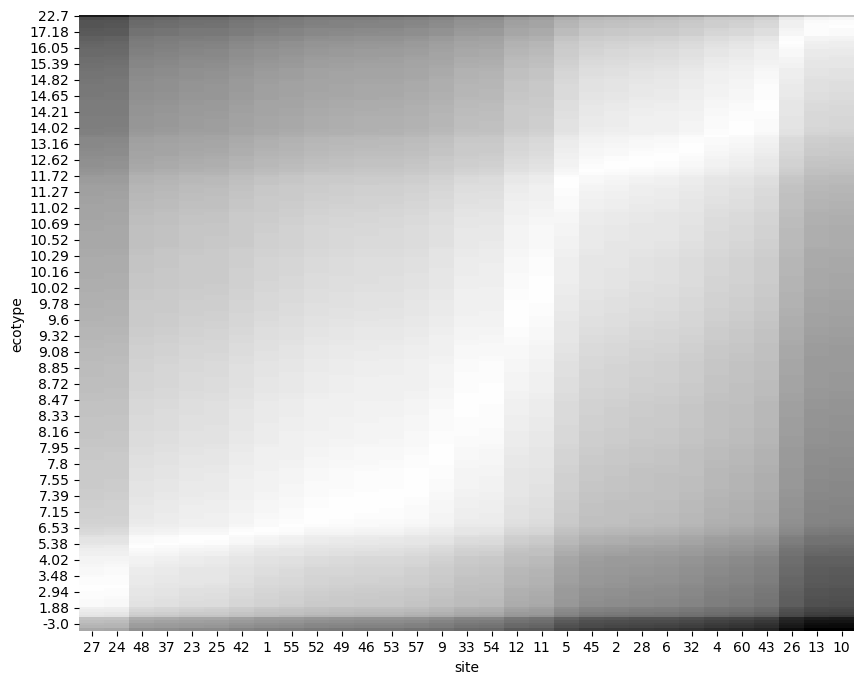

In [105]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap that goes from black to white to black
cmap = LinearSegmentedColormap.from_list(
    'div_black_white_black',
    [(0, 0, 0, 1),  # Black for negative values
     (1, 1, 1, 1),  # White for zero
     (0, 0, 0, 1)]  # Black for positive values
)

# Example heatmap data
data = np.random.randn(10, 10)  # Replace this with your actual data

fig, ax1 = plt.subplots(figsize=(10, 8))

# Replace 'distance_ecotypes_sites_sorted2' with your actual dataset variable
sns.heatmap(distance_ecotypes_sites_sorted2, cmap=cmap, ax=ax1, cbar=False, center=0, xticklabels=True)

plt.show()


/tmp/ipykernel_198710/3803843517.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar on the right


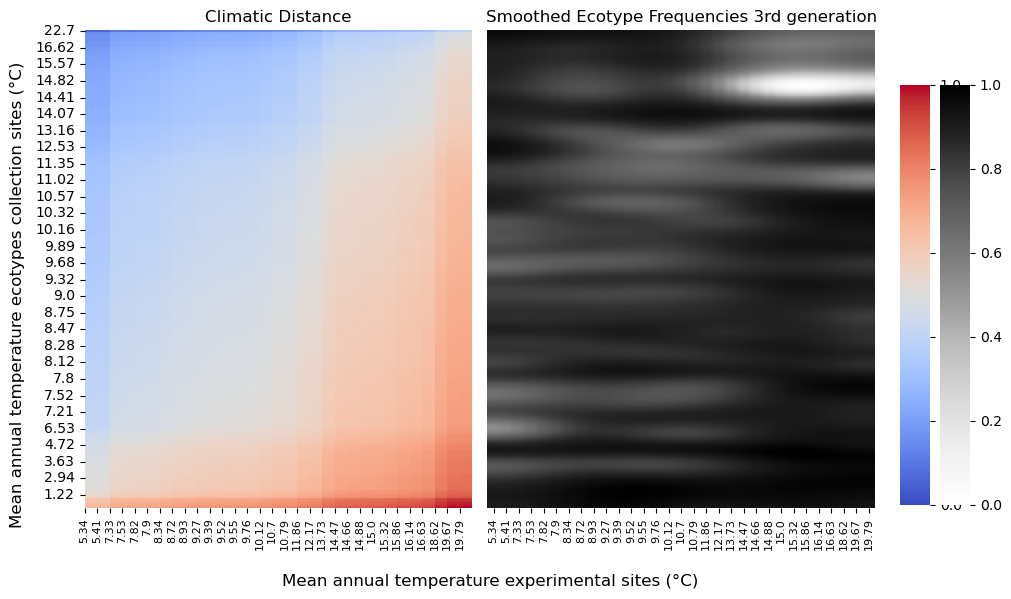

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib as mpl

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# First heatmap (original sorted distance matrix) - no color bar
sns.heatmap(distance_ecotypes_sites_sorted2, cmap='coolwarm', center=0, ax=ax1, cbar=False,
            xticklabels=True)

ax1.set_title("Climatic Distance")

# Set ticks for the first heatmap
ax1.set_xticks(np.arange(len(ef_ecotypes_sites.columns)))
ax1.set_xticklabels(ef_ecotypes_sites.columns, rotation=90, fontsize=8)
ax1.tick_params(bottom=True, top=False)  # Ensure ticks are at the bottom

ax1.set_ylabel('')

ax1.set_xlabel('')
# Second heatmap (smoothed frequency data)
# Convert DataFrame to a NumPy array for processing
data_matrix = ef_ecotypes_sites.to_numpy()

# Replace NaN values with 0 for smoothing
data_matrix[np.isnan(data_matrix)] = 0

# Apply Gaussian smoothing
smoothed_matrix = gaussian_filter(data_matrix, sigma=4)

# Set zeros back to NaN to ignore them in the plot
smoothed_matrix[smoothed_matrix == 0] = np.nan

# Plot the smoothed heatmap on the second axis without colorbar
cax2 = ax2.matshow(smoothed_matrix, cmap='Greys_r', interpolation=None, aspect='auto')

# Remove the black border from the second plot
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Set title for the second heatmap
ax2.set_title("Smoothed Ecotype Frequencies 3rd generation")
ax2.set_yticklabels([])
# Set ticks for the second heatmap
#ax2.set_xticks(np.arange(len(sorted_columns)))
# Ensure ticks and labels are at the bottom
ax2.tick_params(bottom=True, top=False, left=False)  # Ensure ticks are only at the bottom
ax2.set_xticks(np.arange(len(ef_ecotypes_sites.columns)))
ax2.set_xticklabels(ef_ecotypes_sites.columns, rotation=90, fontsize=8)

# Explicitly set the tick labels to the bottom
ax2.xaxis.set_label_position('bottom')  # Set the label position to the bottom
ax2.xaxis.tick_bottom()  # Make suect ratio to ensure same width

# Create a colorbar for the first heatmap using 'Spectral_r' colormap
cbar_ax1 = fig.add_axes([0.91, 0.15, 0.03, 0.7])  # Position for the first colorbar

# Create a ScalarMappable to associate with the 'Spectral_r' colormap
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = plt.get_cmap('coolwarm')
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Needed for colorbar

# Create the first colorbar
cbar1 = fig.colorbar(sm, cax=cbar_ax1)
cbar1.ax.tick_params(labelsize=10)
cbar1.outline.set_visible(False)  # Remove border

# Create a second colorbar for Ecotype Frequency
cbar_ax2 = fig.add_axes([0.95, 0.15, 0.03, 0.7])  # Position for the second colorbar

# Create the second ScalarMappable for the 'Greys' colormap (as in your second plot)
sm2 = mpl.cm.ScalarMappable(cmap='Greys', norm=norm)
sm2.set_array([])  # Needed for colorbar

# Create the second colorbar
cbar2 = fig.colorbar(sm2, cax=cbar_ax2)
cbar2.ax.tick_params(labelsize=10)
cbar2.outline.set_visible(False)  # Remove border

fig.supxlabel('Mean annual temperature experimental sites (°C)')  # Set a common x-axis label for the entire figure
fig.supylabel('Mean annual temperature ecotypes collection sites (°C)')  # Set a common x-axis label for the entire figure

# Adjust layout to make space for the colorbar
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar on the right
plt.savefig('local_adaptation_signal_heatmap.png')
plt.savefig('local_adaptation_signal_heatmap.svg')

plt.show()


In [157]:
ecotype_freq

,plot,site,generation,ecotype,ecotype_freq,ecotypeid,bio1_ecotype,bio1_site
0,2,1,2,10002,0.002026,10002,8.879167,8.720833
1,3,1,2,10002,0.001522,10002,8.879167,8.720833
2,1,1,3,10002,0.000567,10002,8.879167,8.720833
3,4,1,3,10002,0.000265,10002,8.879167,8.720833
4,5,1,3,10002,0.004555,10002,8.879167,8.720833
...,...,...,...,...,...,...,...,...
82000,8,60,1,9992,0.000657,9992,9.887500,16.137501
82001,9,60,1,9992,0.000834,9992,9.887500,16.137501
82002,10,60,1,9992,0.037258,9992,9.887500,16.137501
82003,11,60,1,9992,0.000362,9992,9.887500,16.137501


In [71]:
ecotype_freq['climatic_distance_sq'] = ecotype_freq['climatic_distance']**2

In [72]:
ecotype_freq['log_delta_ef'] = np.log(ecotype_freq['ecotype_freq'])

/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
ecotype_freq['ecotype_str'] = ecotype_freq['ecotype'].astype(str)

In [74]:
ecotype_freq

,plot,site,generation,ecotype,ecotype_freq,ecotypeid,bio1_ecotype,bio1_site,rs,climatic_distance,climatic_distance_sq,log_delta_ef,ecotype_str
0,2,1,2,10002,0.002026,10002,8.879167,8.720833,cold,0.158334,0.025070,-6.201870,10002
1,3,1,2,10002,0.001522,10002,8.879167,8.720833,cold,0.158334,0.025070,-6.488050,10002
2,1,1,3,10002,0.000567,10002,8.879167,8.720833,cold,0.158334,0.025070,-7.475445,10002
3,4,1,3,10002,0.000265,10002,8.879167,8.720833,cold,0.158334,0.025070,-8.236158,10002
4,5,1,3,10002,0.004555,10002,8.879167,8.720833,cold,0.158334,0.025070,-5.391585,10002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82000,8,60,1,9992,0.000657,9992,9.887500,16.137501,hot,-6.250001,39.062512,-7.327066,9992
82001,9,60,1,9992,0.000834,9992,9.887500,16.137501,hot,-6.250001,39.062512,-7.089620,9992
82002,10,60,1,9992,0.037258,9992,9.887500,16.137501,hot,-6.250001,39.062512,-3.289880,9992
82003,11,60,1,9992,0.000362,9992,9.887500,16.137501,hot,-6.250001,39.062512,-7.925249,9992


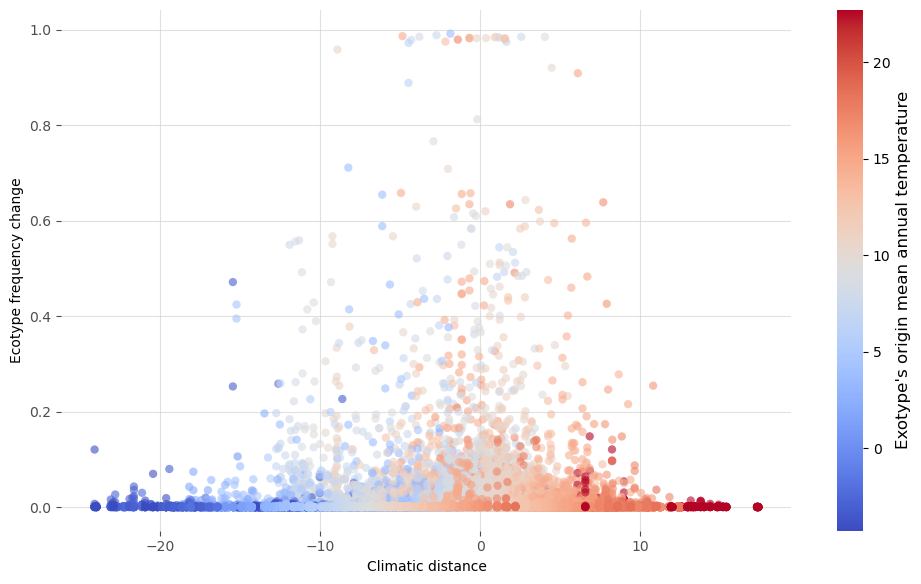

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

font_size = 12
# Set the figure size to make it larger
plt.figure(figsize=(10, 6))
plt.rcParams['axes.axisbelow'] = True

# Normalize the hue to get continuous color mapping for bio1_ecotype values
norm = plt.Normalize(vmin=ecotype_freq['bio1_ecotype'].min(), vmax=ecotype_freq['bio1_ecotype'].max())

# Create the scatter plot with a colormap instead of a legend
scatter = sns.scatterplot(data=ecotype_freq, x='climatic_distance', y='ecotype_freq', 
                          hue='bio1_ecotype', 
                          palette='coolwarm', 
                          alpha=0.6,  # Adjust transparency
                          edgecolor='none',  # Remove the white borders around dots
                          hue_norm=norm,  # Ensure continuous color map
                          legend=False)  # Remove the legend

# Add colorbar for the 'bio1_ecotype' continuous variable
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Needed for colorbar
cbar = plt.colorbar(sm, ax=plt.gca())  # Add colorbar for the scatterplot
cbar.set_label('Exotype\'s origin mean annual temperature', fontsize=font_size)  # Set label for the colorbar

# Remove the black border around the colorbar
cbar.outline.set_visible(False)

# Customize labels
plt.ylabel('Ecotype frequency change')
plt.xlabel('Climatic distance')

# Customize font settings
plt.rc('font', family='sans-serif', size=font_size, weight='normal')  # Regular font size
plt.rc('axes', titlesize=font_size, labelsize=font_size)  # Title and label size for axes
plt.rc('xtick', labelsize=font_size)  # X tick labels size
plt.rc('ytick', labelsize=font_size)  # Y tick labels size

dark_grey = '#4D4D4D'  # Define dark grey color

# Apply to spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors
plt.grid(True, color='lightgrey', alpha=0.7)

# Adjust the layout and show the plot
plt.tight_layout()
#plt.savefig('local_adaptation_classic_plot.png')
#plt.savefig('local_adaptation_classic_plot.svg')

plt.show()


In [76]:
ecotype_freq['climatic_distance_abs'] = abs(ecotype_freq['climatic_distance'])

In [78]:
ecotype_freq

,plot,site,generation,ecotype,ecotype_freq,ecotypeid,bio1_ecotype,bio1_site,rs,climatic_distance,climatic_distance_sq,log_delta_ef,ecotype_str,climatic_distance_abs
0,2,1,2,10002,0.002026,10002,8.879167,8.720833,cold,0.158334,0.025070,-6.201870,10002,0.158334
1,3,1,2,10002,0.001522,10002,8.879167,8.720833,cold,0.158334,0.025070,-6.488050,10002,0.158334
2,1,1,3,10002,0.000567,10002,8.879167,8.720833,cold,0.158334,0.025070,-7.475445,10002,0.158334
3,4,1,3,10002,0.000265,10002,8.879167,8.720833,cold,0.158334,0.025070,-8.236158,10002,0.158334
4,5,1,3,10002,0.004555,10002,8.879167,8.720833,cold,0.158334,0.025070,-5.391585,10002,0.158334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82000,8,60,1,9992,0.000657,9992,9.887500,16.137501,hot,-6.250001,39.062512,-7.327066,9992,6.250001
82001,9,60,1,9992,0.000834,9992,9.887500,16.137501,hot,-6.250001,39.062512,-7.089620,9992,6.250001
82002,10,60,1,9992,0.037258,9992,9.887500,16.137501,hot,-6.250001,39.062512,-3.289880,9992,6.250001
82003,11,60,1,9992,0.000362,9992,9.887500,16.137501,hot,-6.250001,39.062512,-7.925249,9992,6.250001


In [87]:
ecotype_freq_model = ecotype_freq[['climatic_distance_abs', 'log_delta_ef']].replace([np.inf, -np.inf], np.nan).dropna(how='any')

In [ ]:
ecotype_freq['log_delta_ef'] = np.log(ecotype_freq['ecotype_freq'])

In [88]:
# Fit the linear regression model
x = ecotype_freq_model['climatic_distance_abs']
y = ecotype_freq_model['log_delta_ef']
X = sm.add_constant(x)  # Adds a constant term for the intercept
model = sm.OLS(y, X).fit()

In [89]:
x

0        0.158334
1        0.158334
2        0.158334
3        0.158334
4        0.158334
           ...   
82000    6.250001
82001    6.250001
82002    6.250001
82003    6.250001
82004    6.250001
Name: climatic_distance_abs, Length: 74771, dtype: float64

In [90]:
y

0       -6.201870
1       -6.488050
2       -7.475445
3       -8.236158
4       -5.391585
           ...   
82000   -7.327066
82001   -7.089620
82002   -3.289880
82003   -7.925249
82004   -7.892593
Name: log_delta_ef, Length: 74771, dtype: float64

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_delta_ef   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     2410.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:35:24   Log-Likelihood:            -1.4159e+05
No. Observations:               74771   AIC:                         2.832e+05
Df Residuals:                   74769   BIC:                         2.832e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.9010      0.009   -733.953      0.000      -6.919      -6.883
climatic_distance_abs    -0.0760      0.002    -49.096      0.000      -0.079      -0.073
==============================================================================
Omnibus:                     3705.847   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7169.167
Skew:                           0.370   Prob(JB):                         0.00
Kurtosis:                       4.324   Cond. No.                         9.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model.pvalues['climatic_distance_abs']

0.0

/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


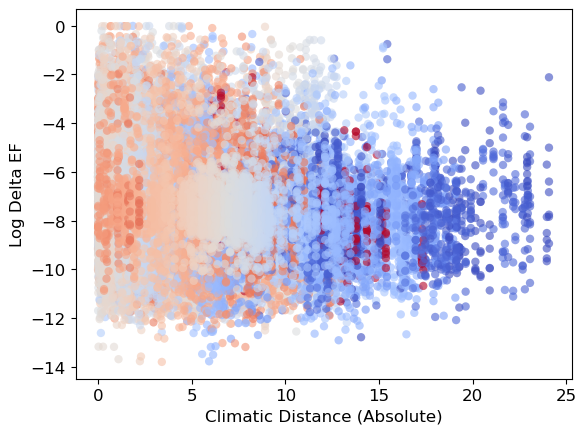

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm



# Create the scatter plot
norm = plt.Normalize(ecotype_freq['bio1_ecotype'].min(), ecotype_freq['bio1_ecotype'].max())
scatter = sns.scatterplot(data=ecotype_freq, x='climatic_distance_abs', y='log_delta_ef', 
                          hue='bio1_ecotype', 
                          palette='coolwarm', 
                          alpha=0.6, 
                          edgecolor='none', 
                          legend=False)


# Display the plot
plt.xlabel('Climatic Distance (Absolute)')
plt.ylabel('Log Delta EF')
plt.show()

In [81]:
model.summary()

/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1732: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_delta_ef   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                nan
Time:                        17:26:10   Log-Likelihood:                    nan
No. Observations:               82005   AIC:                               nan
Df Residuals:                   82003   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                        nan        nan        nan        nan         nan         nan
climatic_distance_abs        nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

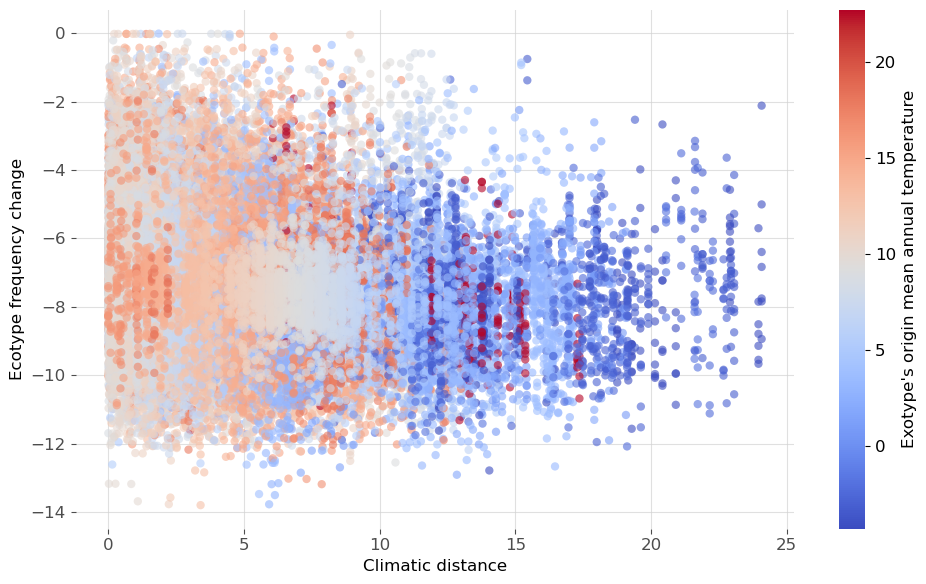

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

font_size = 12
# Set the figure size to make it larger
plt.figure(figsize=(10, 6))
plt.rcParams['axes.axisbelow'] = True

# Normalize the hue to get continuous color mapping for bio1_ecotype values
norm = plt.Normalize(vmin=ecotype_freq['bio1_ecotype'].min(), vmax=ecotype_freq['bio1_ecotype'].max())

# Create the scatter plot with a colormap instead of a legend
scatter = sns.scatterplot(data=ecotype_freq, x='climatic_distance_abs', y='log_delta_ef', 
                          hue='bio1_ecotype', 
                          palette='coolwarm', 
                          alpha=0.6,  # Adjust transparency
                          edgecolor='none',  # Remove the white borders around dots
                          hue_norm=norm,  # Ensure continuous color map
                          legend=False)  # Remove the legend

# Add colorbar for the 'bio1_ecotype' continuous variable
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])  # Needed for colorbar
cbar = plt.colorbar(sm, ax=plt.gca())  # Add colorbar for the scatterplot
cbar.set_label('Exotype\'s origin mean annual temperature', fontsize=font_size)  # Set label for the colorbar

# Remove the black border around the colorbar
cbar.outline.set_visible(False)

# Customize labels
plt.ylabel('Ecotype frequency change')
plt.xlabel('Climatic distance')

# Customize font settings
plt.rc('font', family='sans-serif', size=font_size, weight='normal')  # Regular font size
plt.rc('axes', titlesize=font_size, labelsize=font_size)  # Title and label size for axes
plt.rc('xtick', labelsize=font_size)  # X tick labels size
plt.rc('ytick', labelsize=font_size)  # Y tick labels size

dark_grey = '#4D4D4D'  # Define dark grey color

# Apply to spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors
plt.grid(True, color='lightgrey', alpha=0.7)

# Adjust the layout and show the plot
plt.tight_layout()
#plt.savefig('local_adaptation_classic_plot.png')
#plt.savefig('local_adaptation_classic_plot.svg')

plt.show()


In [171]:
grenenet_ecotypes = pd.read_csv('../key_files/founder_ecotype_frequency.txt', sep = '\t',header=None)[0]

ecotype_freq = ecotype_freq.set_index(grenenet_ecotypes)

ecotype_freq = ecotype_freq.T 
ecotype_freq = ecotype_freq.reset_index()
ecotype_freq['generation'] = ecotype_freq['index'].str.split('_').str[1]

ecotype_freq['plot'] = ecotype_freq['index'].str.split('_').str[2]

ecotype_freq['site'] = ecotype_freq['index'].str.split('_').str[0] 

ecotype_freq['generation'].unique()

ecotype_freq = ecotype_freq.drop('index', axis=1)

ecotype_freq = ecotype_freq.melt(id_vars = ['plot','site', 'generation'])

ecotype_freq.columns = ['plot','site', 'generation', 'ecotype', 'freq']

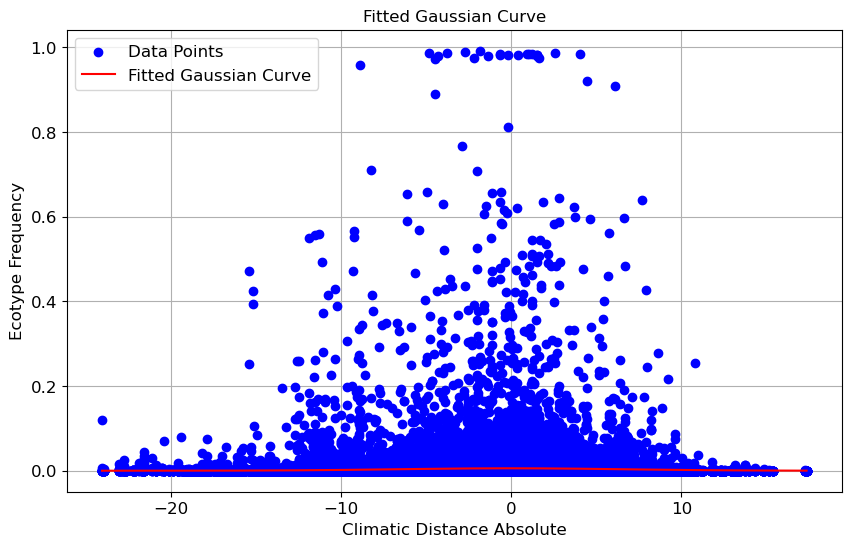

In [172]:
# Define the Gaussian function
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b)**2) / (2 * c**2))

# Fit the Gaussian model
gaussian_params, gaussian_covariance = curve_fit(gaussian, x_data, y_data, p0=[1, np.mean(x_data), np.std(x_data)])

# Generate x values for the Gaussian curve
x_gaussian = np.linspace(min(x_data), max(x_data), 400)
y_gaussian = gaussian(x_gaussian, *gaussian_params)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', label='Data Points')
plt.plot(x_gaussian, y_gaussian, color='red', label='Fitted Gaussian Curve')
plt.title('Fitted Gaussian Curve')
plt.xlabel('Climatic Distance Absolute')
plt.ylabel('Ecotype Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [184]:
ecotype_freq['ecotype_freq_r'] = ecotype_freq['ecotype_freq'].round(1)

In [185]:
x_data = ecotype_freq['climatic_distance']
y_data = ecotype_freq['ecotype_freq_r']

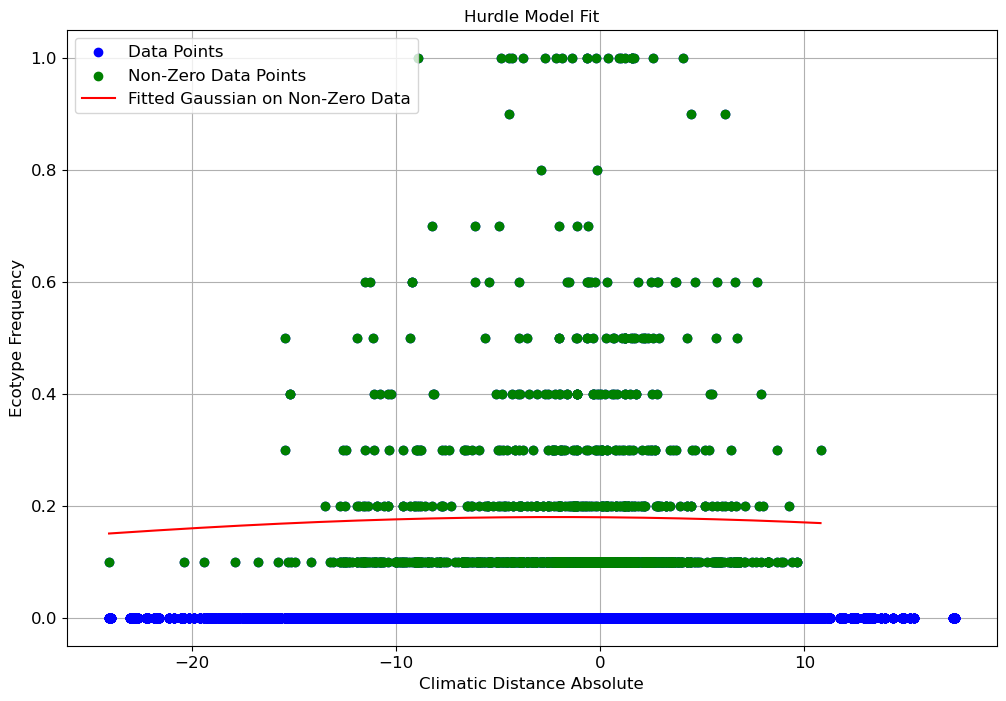

In [186]:
import statsmodels.api as sm

# Step 1: Prepare data for the binary model
# Creating a binary outcome where 1 represents non-zero values and 0 represents zero values
binary_outcome = (y_data != 0).astype(int)

# Add a constant to the features for the logistic regression model
x_data_const = sm.add_constant(x_data)

# Fit the logistic regression model
logit_model = sm.Logit(binary_outcome, x_data_const)
logit_result = logit_model.fit(disp=0)  # disp=0 suppresses the output during the fit

# Step 2: Fit the Gaussian to non-zero values only
non_zero_indices = y_data != 0
x_data_non_zero = x_data[non_zero_indices]
y_data_non_zero = y_data[non_zero_indices]

# Fit the Gaussian model to non-zero data
non_zero_params, non_zero_covariance = curve_fit(gaussian, x_data_non_zero, y_data_non_zero, p0=[1, np.mean(x_data_non_zero), np.std(x_data_non_zero)])

# Generate predictions for the logistic and Gaussian models
x_gaussian_non_zero = np.linspace(min(x_data_non_zero), max(x_data_non_zero), 400)
y_gaussian_non_zero = gaussian(x_gaussian_non_zero, *non_zero_params)
prob_non_zero = logit_result.predict(x_data_const)  # Probability of non-zero values

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(x_data, y_data, color='blue', label='Data Points')
plt.scatter(x_data_non_zero, y_data_non_zero, color='green', label='Non-Zero Data Points')
plt.plot(x_gaussian_non_zero, y_gaussian_non_zero, color='red', label='Fitted Gaussian on Non-Zero Data')
plt.title('Hurdle Model Fit')
plt.xlabel('Climatic Distance Absolute')
plt.ylabel('Ecotype Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [133]:
ecotype_freq[['ecotype_freq','climatic_distance_abs']].to_csv('exp_decay.csv',index=None)

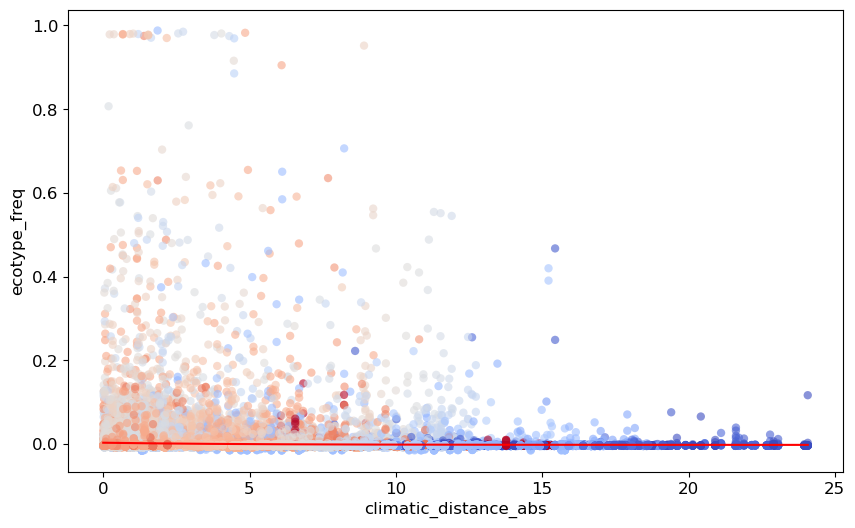

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the exponential decay function
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Sample data - replace with your actual data
# Assuming 'climatic_distance_abs' and 'ecotype_freq' are columns in your DataFrame
x_data = ecotype_freq['climatic_distance_abs']
y_data = ecotype_freq['ecotype_freq']

# Fit the exponential decay model
params, params_covariance = curve_fit(exp_decay, x_data, y_data, p0=[1, 1, 1])

# Plotting
plt.figure(figsize=(10, 6))
plt.rcParams['axes.axisbelow'] = True
norm = plt.Normalize(vmin=ecotype_freq['bio1_ecotype'].min(), vmax=ecotype_freq['bio1_ecotype'].max())
scatter = sns.scatterplot(data=ecotype_freq, x='climatic_distance_abs', y='ecotype_freq', 
                          hue='bio1_ecotype', palette='coolwarm', alpha=0.6, edgecolor='none',
                          hue_norm=norm, legend=False)

# Plot the exponential decay curve
x_model = np.linspace(min(x_data), max(x_data), 400)
y_model = exp_decay(x_model, *params)
plt.plot(x_model, y_model, color='red')  # You can change the color if needed

# Continue with the rest of your plotting setup here...

plt.show()


Slope: -0.0003654899936921421
P-value: 0.00019929193248466193


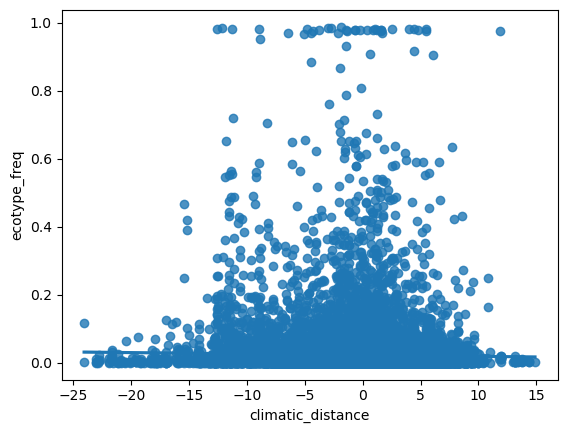

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Extract the relevant data
x = ecotype_freq['climatic_distance']
y = ecotype_freq['ecotype_freq']

# Fit a linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print the slope and p-value
print(f"Slope: {slope}")
print(f"P-value: {p_value}")

# Plot the regression using Seaborn regplot
sns.regplot(x=x, y=y, data=ecotype_freq)

# Display the plot
plt.show()

In [319]:
ecotype_freq = ecotype_freq.dropna()

Slope: -0.001131298774297853
P-value: 6.821403077520283e-05


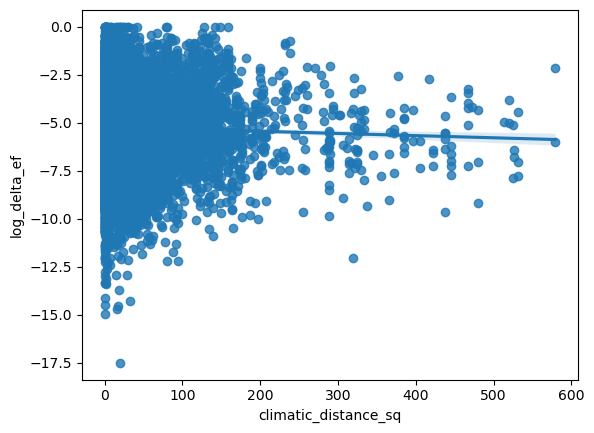

In [320]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Extract the relevant data
x = ecotype_freq['climatic_distance_sq']
y = ecotype_freq['log_delta_ef']

# Fit a linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print the slope and p-value
print(f"Slope: {slope}")
print(f"P-value: {p_value}")

# Plot the regression using Seaborn regplot
sns.regplot(x=x, y=y, data=ecotype_freq)

# Display the plot
plt.show()


In [316]:
stats.linregress(x, y)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

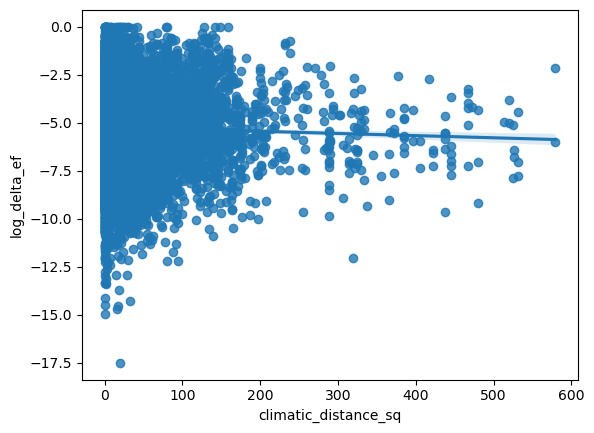

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fit a linear regression using Seaborn's regplot
sns.regplot(data=ecotype_freq, x='climatic_distance_sq', y='log_delta_ef')

# Display the plot
plt.show()


In [40]:
import numpy as np

In [ ]:
pd.pivot_table()

In [42]:
ecotype_freq['bio1_ecotype']

0         8.879167
1         8.879167
2         8.879167
3         8.879167
4         8.879167
            ...   
172090    9.887500
172091    9.887500
172092    9.887500
172093    9.887500
172094    9.887500
Name: bio1_ecotype, Length: 172095, dtype: float64

In [41]:
# Calculate the pairwise differences between the two columns
difference_matrix = np.subtract.outer(ecotype_freq['bio1_ecotype'], ecotype_freq['bio1_site'])

# Convert the difference matrix into a DataFrame if desired
difference_df = pd.DataFrame(difference_matrix, 
                             index=ecotype_freq['bio1_ecotype'], 
                             columns=ecotype_freq['bio1_site'])

MemoryError: Unable to allocate 221. GiB for an array with shape (172095, 172095) and data type float64

In [23]:
import numpy as np

In [24]:
# Assuming df is your DataFrame named ecotype_freq
# Ensure that the DataFrame contains only the relevant generations
df = ecotype_freq[ecotype_freq['generation'].isin([1, 2, 3])]

# Function to check if frequency increases
def is_increasing(group):
    # Ensure the group is sorted by generation
    group = group.sort_values(by='generation')
    # Check if the last frequency is greater than the first, given there are at least two data points to compare
    if len(group['freq']) > 1:
        return group['freq'].iloc[-1] > group['freq'].iloc[0]
    else:
        return np.nan  # Return False if not enough data to compare

# Group by site, plot, and ecotype, then apply the function and reset index properly
result = df.groupby(['site', 'plot', 'ecotype']).apply(is_increasing).reset_index(name='increased')


In [25]:
#import os

In [26]:
#clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

In [30]:
result['increased'].value_counts()

increased
False    43045
True     14243
Name: count, dtype: int64

In [31]:
result = result.merge(clim_sites_during_exp, on ='site')

In [32]:
result

,site,plot,ecotype,increased,bio1
0,1,1,159,False,8.720833
1,1,1,265,True,8.720833
2,1,1,763,False,8.720833
3,1,1,765,False,8.720833
4,1,1,766,False,8.720833
...,...,...,...,...,...
82000,9,9,10011,False,10.116667
82001,9,9,10013,False,10.116667
82002,9,9,10014,False,10.116667
82003,9,9,100001,False,10.116667


In [33]:
result.columns = ['site', 'plot', 'ecotype', 'increased', 'bio1_exp']

In [34]:
result = result.merge(clim1001f, left_on = 'ecotype', right_on ='ecotypeid')

In [35]:
result = result.drop('ecotypeid',axis=1)

In [36]:
result.columns = ['site', 'plot', 'ecotype', 'increased', 'bio1_exp', 'bio1_ecotype']

In [37]:
result['bio1_exp'] = result['bio1_exp'].round(2)
result['bio1_ecotype'] = result['bio1_ecotype'].round(2)

In [38]:
bioexp_vs_bioecotype = result.pivot_table(index = 'bio1_exp', columns = 'bio1_ecotype', values= 'increased' )

In [39]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.sort_index() 

In [40]:
sorted_columns = sorted(bioexp_vs_bioecotype.columns)
bioexp_vs_bioecotype = bioexp_vs_bioecotype[sorted_columns]

In [41]:
clim1001f['bio1'] = clim1001f['bio1'].round(2)

/tmp/ipykernel_1080388/1059384320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clim1001f['bio1'] = clim1001f['bio1'].round(2)


In [42]:
clim1001f['ecotype_bio1'] = clim1001f['ecotypeid'].astype(str) + '_' + clim1001f['bio1'].astype(str)

/tmp/ipykernel_1080388/2563707021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clim1001f['ecotype_bio1'] = clim1001f['ecotypeid'].astype(str) + '_' + clim1001f['bio1'].astype(str)


In [43]:
clim1001f_dcit = clim1001f.set_index('bio1')['ecotype_bio1'].to_dict()

In [44]:
bioexp_vs_bioecotype.columns = bioexp_vs_bioecotype.columns.map(clim1001f_dcit)

In [45]:
clim_sites_during_exp['bio1'] = clim_sites_during_exp['bio1'].round(2)

In [46]:
clim_sites_during_exp['site_bio1'] = clim_sites_during_exp['site'].astype(str) + '_' + clim_sites_during_exp['bio1'].astype(str)

In [47]:
clim_sites_during_exp_dict = clim_sites_during_exp.set_index('bio1')['site_bio1'].to_dict()

In [48]:
bioexp_vs_bioecotype.index = bioexp_vs_bioecotype.index.map(clim_sites_during_exp_dict)

In [49]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.fillna(0)

In [50]:
bioexp_vs_bioecotype

bio1_ecotype,766_-4.28,7298_-3.27,763_-3.0,765_-2.49,9766_-1.93,768_0.72,9634_1.22,772_1.62,8354_1.88,9632_2.66,...,9879_16.59,9522_16.62,9726_17.17,9559_17.18,7067_17.23,7063_17.7,9657_17.75,9944_17.84,6939_18.33,6911_22.7
bio1_exp,,,,,,,,,,,,,,,,,,,,,
27_5.34,0.100000,0.300000,0.400000,0.200000,0.200000,0.100000,0.100000,0.200000,0.200000,0.200000,...,0.100000,0.300000,0.300000,0.200000,0.200000,0.100000,0.200000,0.300000,0.200000,0.300000
24_5.41,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000
48_7.33,0.000000,0.800000,0.200000,0.200000,0.200000,0.000000,0.000000,0.200000,0.200000,0.000000,...,0.600000,0.400000,0.200000,0.800000,0.600000,1.000000,0.200000,0.400000,0.800000,0.400000
25_7.9,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.083333,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333
42_8.34,0.000000,0.300000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,...,0.400000,0.400000,0.200000,0.300000,0.200000,0.100000,0.200000,0.200000,0.200000,0.200000
1_8.72,0.083333,0.083333,0.083333,0.000000,0.000000,0.000000,0.083333,0.083333,0.083333,0.083333,...,0.000000,0.083333,0.083333,0.000000,0.083333,0.083333,0.083333,0.000000,0.000000,0.083333
55_8.93,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.200000,0.200000,0.100000,0.100000,0.000000,0.100000,0.100000,0.200000,0.100000,0.100000
52_9.27,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333
49_9.39,0.363636,0.272727,0.363636,0.272727,0.363636,0.181818,0.181818,0.363636,0.181818,0.181818,...,0.000000,0.090909,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.181818,0.000000


In [51]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.T

In [52]:
bioexp_vs_bioecotype = bioexp_vs_bioecotype.T

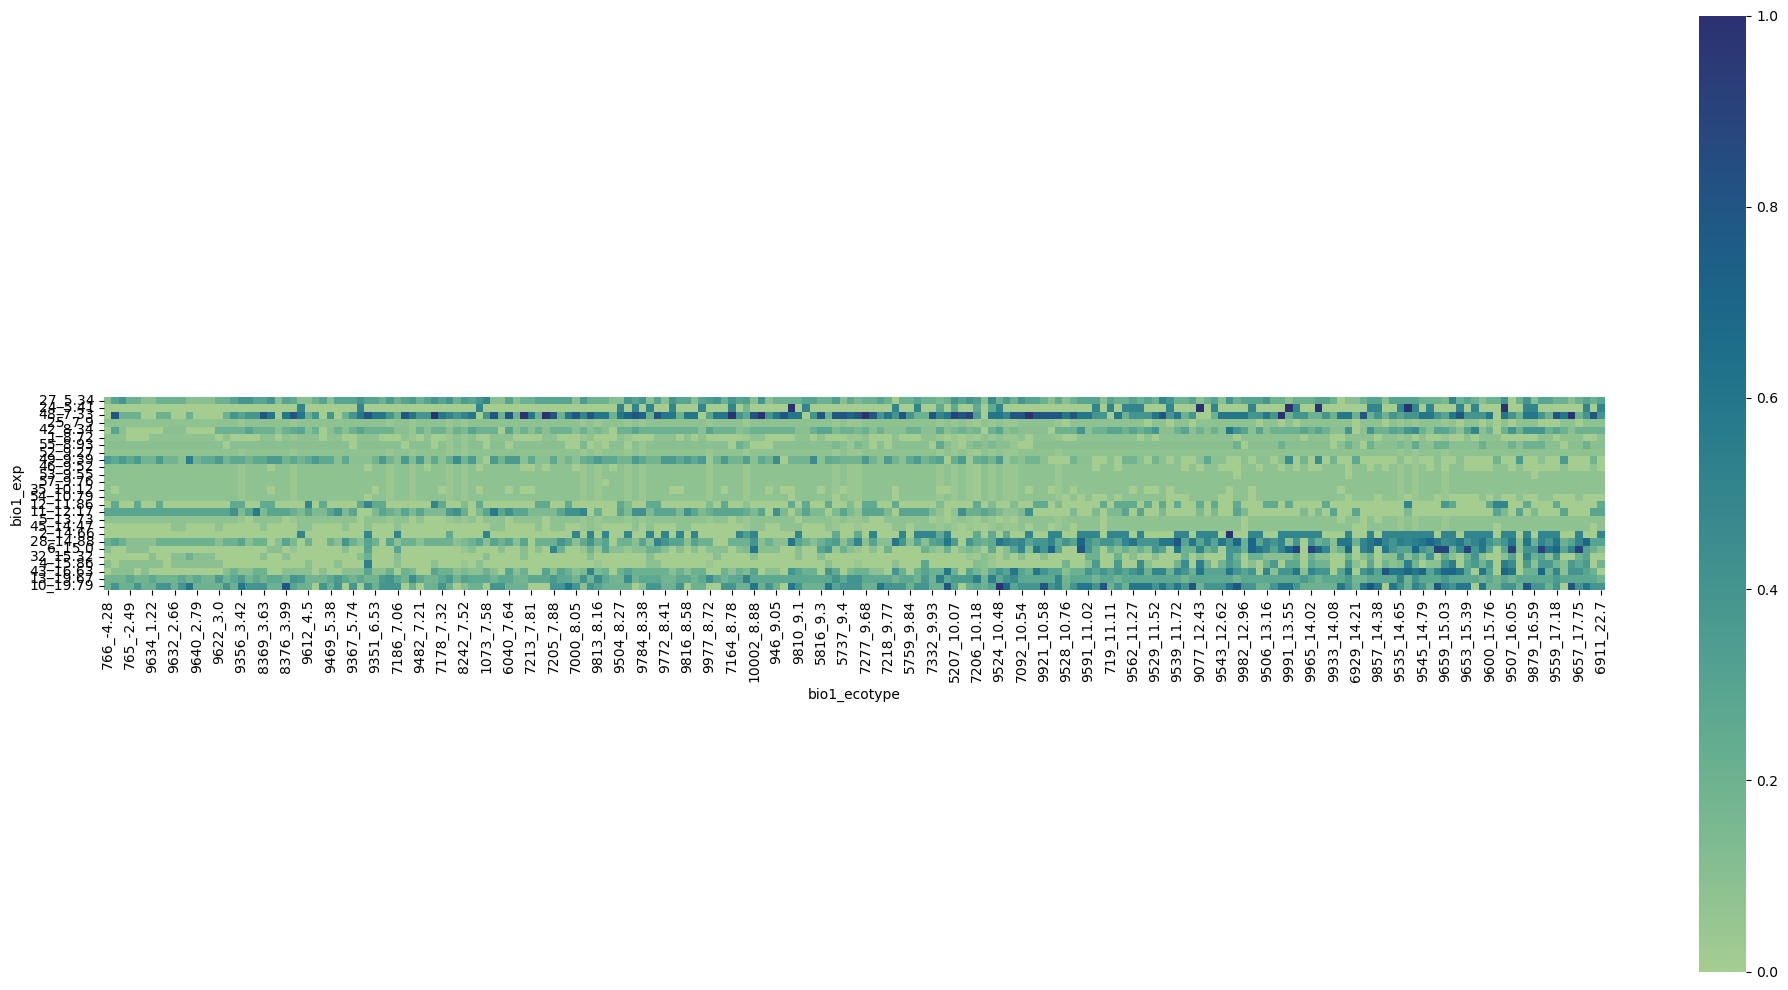

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming bioexp_vs_bioecotype is your DataFrame
plt.figure(figsize=(20, 10))  # Set the size of the figure

# Create the heatmap with a horizontal color bar at the top
ax = sns.heatmap(bioexp_vs_bioecotype, cmap="crest",     square=True,
) # cbar_kws={'orientation': 'horizontal', 'label': 'Color scale', 'location': 'top'}

# Optionally adjust layout to make room for tick labels
plt.tight_layout()
#plt.savefig('bio1_exp_vs_collectionsite.png')
# Show the plot
plt.show()

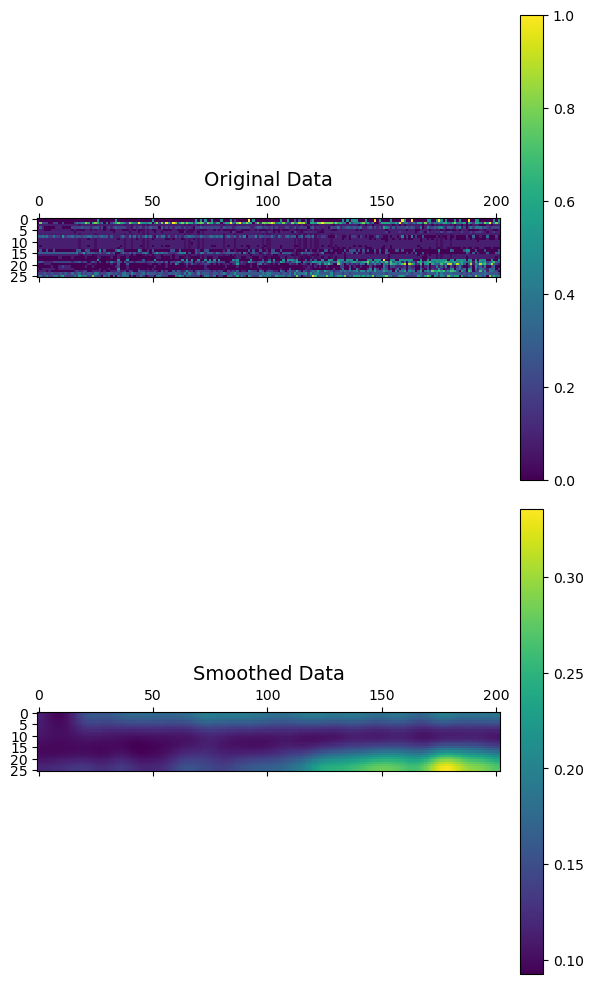

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Convert DataFrame to a NumPy array for processing
data_matrix = bioexp_vs_bioecotype.to_numpy()

# Replace NaN values with 0, so they don't affect the smoothing
data_matrix[np.isnan(data_matrix)] = 0

# Apply Gaussian smoothing
smoothed_matrix = gaussian_filter(data_matrix, sigma=5)

# Optionally, set zeros back to NaN for ignoring them in the plot
smoothed_matrix[smoothed_matrix == 0] = np.nan

# Create taller figure with more height
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=1, figsize=(6, 10))  # Taller rather than wider

# Plot the original data
cax1 = ax1.matshow(data_matrix, cmap='viridis')
ax1.set_title("Original Data", fontsize=14)
fig.colorbar(cax1, ax=ax1, fraction=0.046, pad=0.04)  # Adjust colorbar size

# Plot the smoothed data
cax2 = ax2.matshow(smoothed_matrix, cmap='viridis')
ax2.set_title("Smoothed Data", fontsize=14)
fig.colorbar(cax2, ax=ax2, fraction=0.046, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()


<Figure size 2000x600 with 0 Axes>

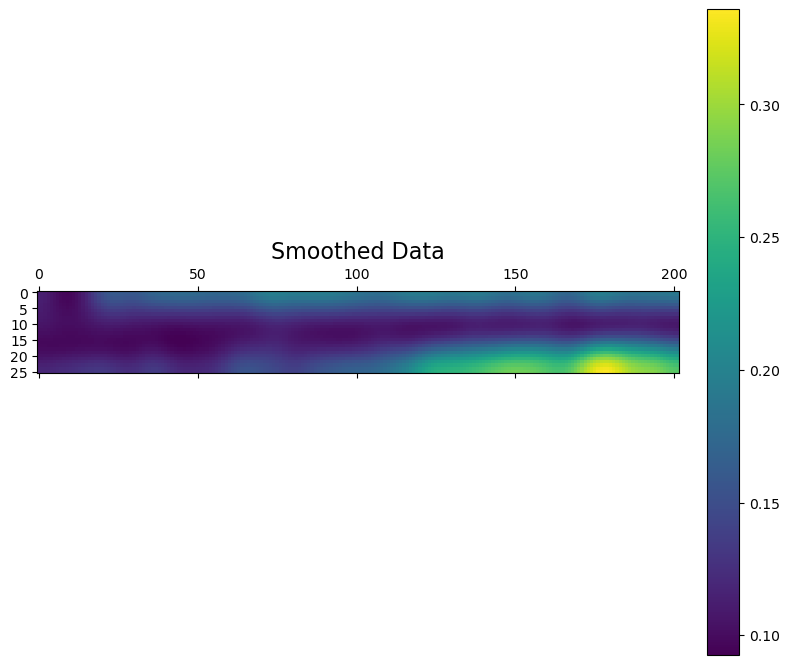

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

plt.figure(figsize=(20, 6))
# Assuming bioexp_vs_bioecotype is already available as your DataFrame
# Convert DataFrame to NumPy array for processing
data_matrix = bioexp_vs_bioecotype.to_numpy()

# Replace NaN values with 0, so they don't affect the smoothing
data_matrix[np.isnan(data_matrix)] = 0

# Apply Gaussian smoothing
smoothed_matrix = gaussian_filter(data_matrix, sigma=5)

# Optionally, set zeros back to NaN for ignoring them in the plot
smoothed_matrix[smoothed_matrix == 0] = np.nan

# Create a larger figure specifically for the smoothed plot
fig, ax = plt.subplots(figsize=(8, 10))  # Make the plot bigger with 8 width and 10 height

# Plot the smoothed data
cax = ax.matshow(smoothed_matrix, cmap='viridis')

# Add a title with larger font size
ax.set_title("Smoothed Data", fontsize=16)

# Add colorbar and adjust its size
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()


In [63]:
smoothed_matrix

array([[0.11461181, 0.11363203, 0.11177809, ..., 0.19113038, 0.19160324,
        0.19186659],
       [0.1143964 , 0.11343994, 0.11163039, ..., 0.18762217, 0.18806579,
        0.18831337],
       [0.11399862, 0.11308692, 0.11136253, ..., 0.18092298, 0.18131195,
        0.18153005],
       ...,
       [0.11453456, 0.11467684, 0.11495686, ..., 0.26558645, 0.26353787,
        0.26244231],
       [0.11713564, 0.11729357, 0.11760378, ..., 0.27181448, 0.26974996,
        0.26864486],
       [0.11854963, 0.11871581, 0.11904188, ..., 0.27495911, 0.27288909,
        0.27178053]])

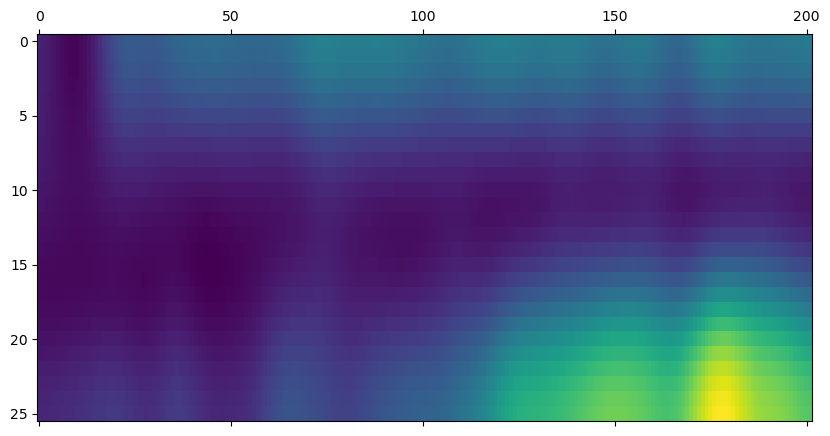

In [68]:
plt.figure(figsize=(10,5))
plt.matshow(smoothed_matrix, cmap='viridis',interpolation=None, aspect='auto',fignum=1)